In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [10]:
# Load the dataset
data = pd.read_csv(r'C:\Users\marti\Desktop\Project1_DataZoomcamp\Zoomcamp\Project_1\Data_kredit.csv')   # Replace with your dataset path

# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# If missing values are found, display a warning
if data.isnull().sum().any():
    print("\nWarning: The dataset contains missing values!")
else:
    print("\nNo missing values detected.")



Checking for missing values:
CreditRisk        0
ID                0
CreditScore       0
PaymentDelays     0
EmployedMonths    0
DebtRatio         0
CreditAmount      0
Liquidity         0
CreditLines       0
dtype: int64

No missing values detected.


In [11]:
# Display the first few rows of the dataset
print("\nPreview of the first few rows of the dataset:")
print(data.head())


Preview of the first few rows of the dataset:
  CreditRisk      ID  CreditScore  PaymentDelays  EmployedMonths  DebtRatio  \
0       nein  744488          607              5              29      3.414   
1       nein  350833          533              8              21      3.737   
2         ja  466037          474             12              25      5.061   
3         ja  721737          551             13               3      5.926   
4       nein  455703          768              0              13      1.910   

   CreditAmount  Liquidity  CreditLines  
0        103519       2696            6  
1         74868       5336            8  
2         93468       1785            4  
3         41708       2104           10  
4        318995      11523            3  


In [13]:
# Convert "ja"/"nein" to numerical values in the 'creditRisk' column
if "CreditRisk" in data.columns:  # Check if the column exists
    print("\nEncoding 'CreditRisk' column (ja/nein):")
    data["CreditRisk"] = data["CreditRisk"].map({"ja": 1, "nein": 0})
    print(data["CreditRisk"].value_counts())
else:
    print("\nColumn 'CreditRisk' not found. Skipping encoding.")


Encoding 'CreditRisk' column (ja/nein):
CreditRisk
0    462
1    214
Name: count, dtype: int64


In [16]:
# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [17]:
# Convert X to a pandas DataFrame for compatibility
X = pd.DataFrame(X, columns=data.columns[:-1])  # Keep original column names

In [18]:
# Check for categorical columns in features
print("\nChecking for categorical columns in X:")
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols.tolist()}")


Checking for categorical columns in X:
Categorical columns: []


In [19]:
# Encode categorical features
if len(categorical_cols) > 0:
    print("\nEncoding categorical features...")
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [20]:
# Verify the preprocessing
print("\nPreprocessed features (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())


Preprocessed features (X):
   CreditRisk        ID  CreditScore  PaymentDelays  EmployedMonths  \
0         0.0  744488.0        607.0            5.0            29.0   
1         0.0  350833.0        533.0            8.0            21.0   
2         1.0  466037.0        474.0           12.0            25.0   
3         1.0  721737.0        551.0           13.0             3.0   
4         0.0  455703.0        768.0            0.0            13.0   

   DebtRatio  CreditAmount  Liquidity  
0      3.414      103519.0     2696.0  
1      3.737       74868.0     5336.0  
2      5.061       93468.0     1785.0  
3      5.926       41708.0     2104.0  
4      1.910      318995.0    11523.0  

Target variable (y):


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [22]:
# Split the data into training (60%), testing (20%), and evaluation (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display dataset sizes
print(f"\nDataset sizes:")
print(f"Training: {X_train.shape[0]} samples")
print(f"Testing: {X_test.shape[0]} samples")
print(f"Evaluation: {X_eval.shape[0]} samples")



Dataset sizes:
Training: 405 samples
Testing: 135 samples
Evaluation: 136 samples


In [23]:
# List of models to train and evaluate
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Naive Bayes": GaussianNB()
}

In [24]:
# Initialize a dictionary to store the results of each model
results = {}


Training the model: KNN

KNN - Classification Report:
              precision    recall  f1-score   support

           1       0.10      0.17      0.12         6
           2       0.09      0.18      0.12        11
           3       0.23      0.28      0.25        18
           4       0.21      0.28      0.24        25
           5       0.13      0.11      0.12        19
           6       0.00      0.00      0.00        13
           7       0.25      0.10      0.14        10
           8       0.20      0.08      0.12        12
           9       0.20      0.12      0.15        16
          10       0.17      0.33      0.22         3
          12       0.00      0.00      0.00         2

    accuracy                           0.16       135
   macro avg       0.14      0.15      0.14       135
weighted avg       0.16      0.16      0.15       135



c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marti\anaconda3\Lib\site-packag

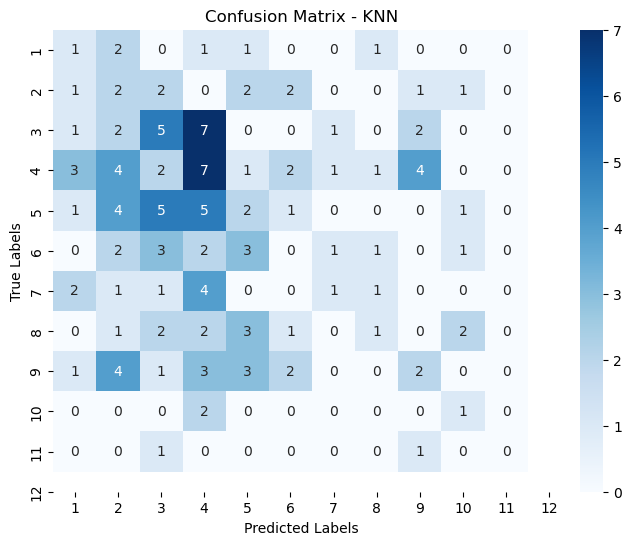


Training the model: Random Forest


c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marti\anaconda3\Lib\site-packag


Random Forest - Classification Report:
              precision    recall  f1-score   support

           1       0.20      0.17      0.18         6
           2       0.11      0.09      0.10        11
           3       0.21      0.33      0.26        18
           4       0.19      0.16      0.17        25
           5       0.33      0.21      0.26        19
           6       0.14      0.23      0.18        13
           7       0.12      0.10      0.11        10
           8       0.11      0.08      0.10        12
           9       0.17      0.12      0.14        16
          10       0.11      0.33      0.17         3
          12       0.00      0.00      0.00         2

    accuracy                           0.18       135
   macro avg       0.15      0.17      0.15       135
weighted avg       0.18      0.18      0.17       135



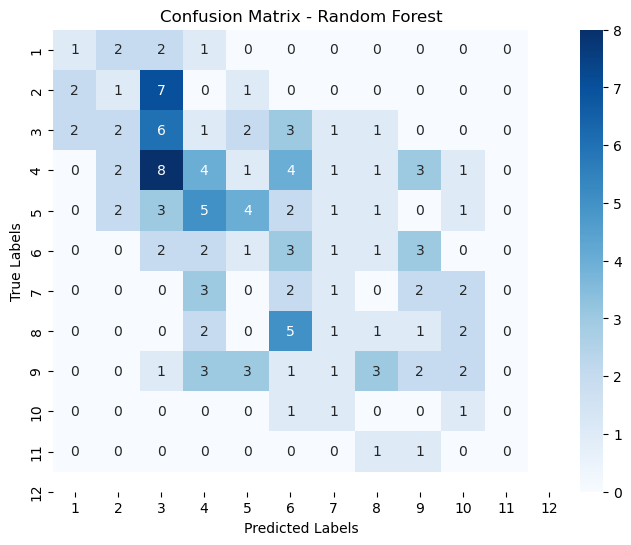


Training the model: Support Vector Machine

Support Vector Machine - Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        18
           4       0.19      0.72      0.30        25
           5       0.13      0.26      0.17        19
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2

    accuracy                           0.17       135
   macro avg       0.03      0.09      0.04       135
weighted avg       0.05      0.17      0.08       135



c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marti\anaconda3\Lib\site-packag

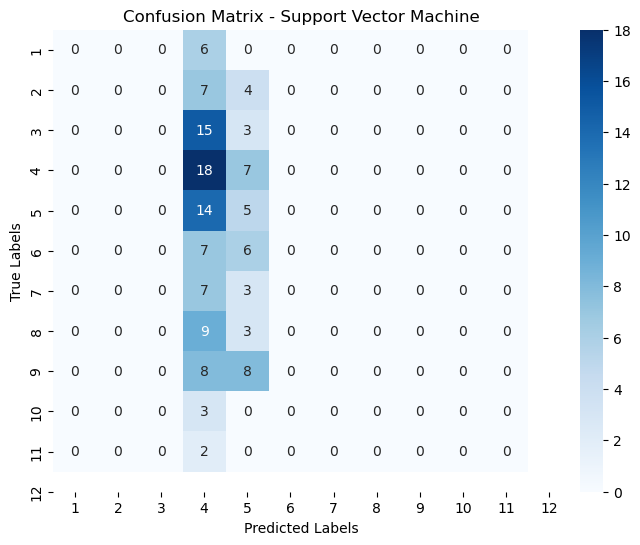


Training the model: Logistic Regression

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.38      0.45      0.42        11
           3       0.19      0.28      0.22        18
           4       0.21      0.48      0.29        25
           5       0.00      0.00      0.00        19
           6       0.17      0.31      0.22        13
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        12
           9       0.15      0.12      0.14        16
          10       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2

    accuracy                           0.21       135
   macro avg       0.10      0.15      0.12       135
weighted avg       0.13      0.21      0.15       135



c:\Users\marti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

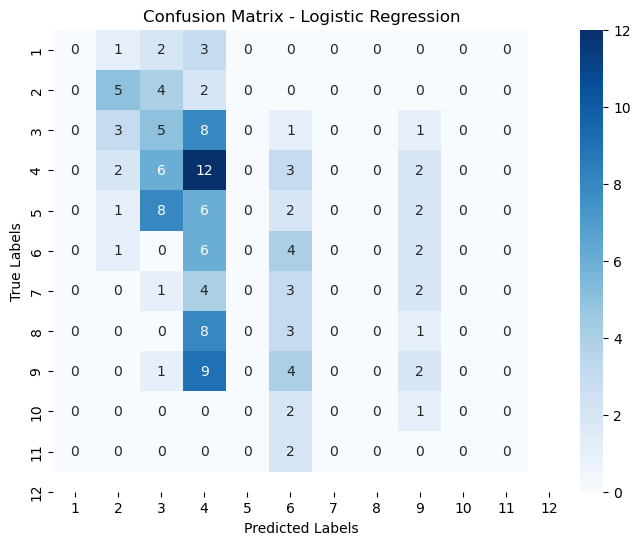


Training the model: Naive Bayes

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.33      0.29         6
           2       0.23      0.45      0.30        11
           3       0.20      0.22      0.21        18
           4       0.33      0.04      0.07        25
           5       0.50      0.11      0.17        19
           6       0.15      0.15      0.15        13
           7       0.17      0.20      0.18        10
           8       0.25      0.08      0.12        12
           9       0.31      0.31      0.31        16
          10       0.06      0.67      0.11         3
          12       0.00      0.00      0.00         2

    accuracy                           0.19       135
   macro avg       0.22      0.23      0.18       135
weighted avg       0.28      0.19      0.18       135



c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marti\anaconda3\Lib\site-packag

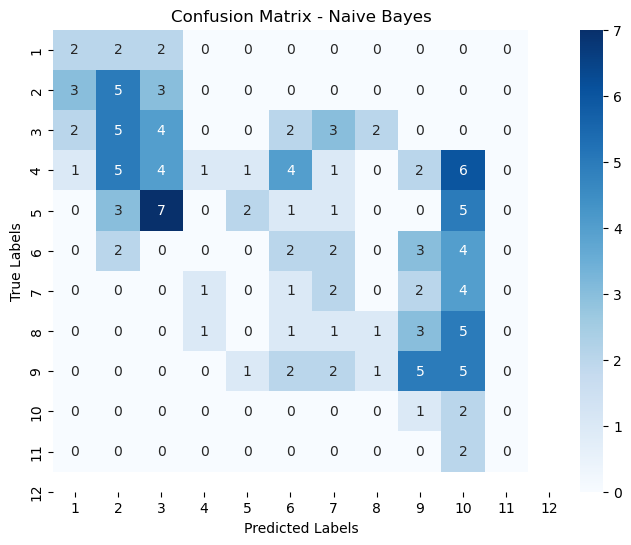

In [25]:
# Loop through each model
for name, model in models.items():
    print(f"\nTraining the model: {name}")
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # If the model supports probability predictions, calculate ROC AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    else:
        roc_auc = np.nan  # Not applicable for models like SVM without probabilistic kernels
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # Store the results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    }
# Display the classification report
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [26]:
# Display a summary of model performances
print("\nPerformance Summary:")
performance_df = pd.DataFrame(results).T
print(performance_df)


Performance Summary:
                        Accuracy  Precision    Recall  F1-Score   ROC AUC
KNN                     0.162963   0.163906  0.162963  0.154234  0.549905
Random Forest           0.177778   0.182830  0.177778  0.173122  0.767013
Support Vector Machine  0.170370   0.052766  0.170370  0.079362  0.537505
Logistic Regression     0.207407   0.128628  0.207407  0.154296  0.626062
Naive Bayes             0.192593   0.276162  0.192593  0.182064  0.719776


In [28]:
# Identify the best model based on F1-Score
best_model_name = performance_df["F1-Score"].idxmax()
best_model_score = performance_df["F1-Score"].max()
best_model = models[best_model_name]

# Print details about the best model and the reason for its selection
print(f"\nThe best model selected is: {best_model_name}")
print(f"Reason: {best_model_name} achieved the highest F1-Score of {best_model_score:.2f} among all evaluated models.")
print(f"This indicates that {best_model_name} strikes the best balance between precision and recall, "
      "making it the most reliable for classification in this scenario.")


The best model selected is: Naive Bayes
Reason: Naive Bayes achieved the highest F1-Score of 0.18 among all evaluated models.
This indicates that Naive Bayes strikes the best balance between precision and recall, making it the most reliable for classification in this scenario.


In [29]:
# Save only the best model
joblib.dump(best_model, 'best_model.pkl')
print(f"\nThe model {best_model_name} has been saved as 'best_model.pkl'")


The model Naive Bayes has been saved as 'best_model.pkl'


In [30]:
# Evaluate the best model on the evaluation set
print("\nEvaluating the best model on the evaluation set:")
y_eval_pred = best_model.predict(X_eval)
eval_accuracy = accuracy_score(y_eval, y_eval_pred)
eval_f1 = f1_score(y_eval, y_eval_pred, average="weighted")
print(f"Accuracy on the evaluation set: {eval_accuracy:.2f}")
print(f"F1-Score on the evaluation set: {eval_f1:.2f}")



Evaluating the best model on the evaluation set:
Accuracy on the evaluation set: 0.14
F1-Score on the evaluation set: 0.12
